In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('fivethirtyeight')

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

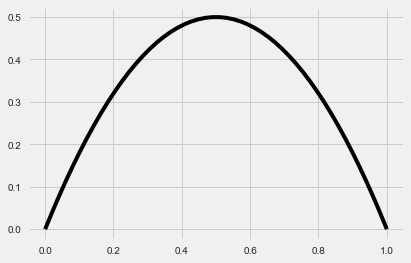

In [24]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

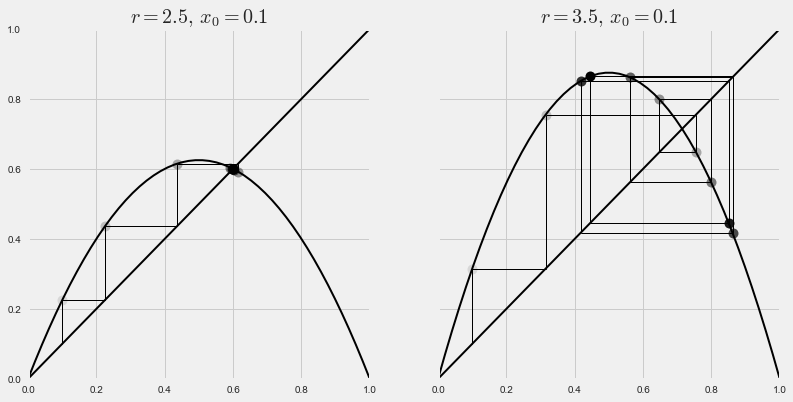

In [40]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

In [54]:
n = 10000
r = np.linspace(2.5, 4.0, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)

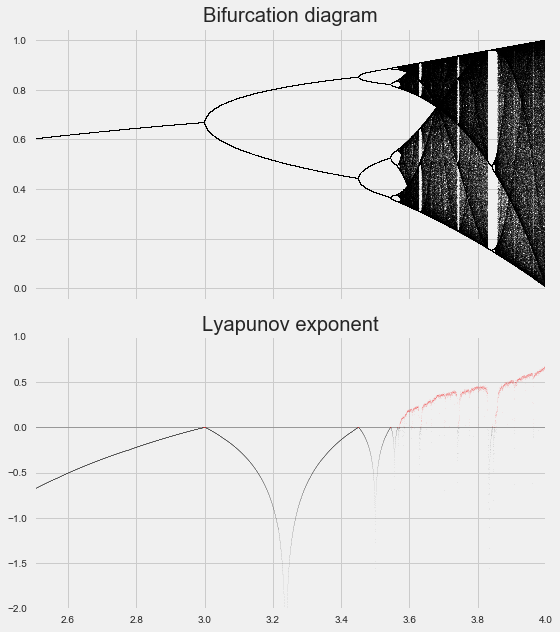

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

## Cellular Automata

In [58]:
u = np.array([[4], [2], [1]])
def step(x, rule_b):
    """Compute a single stet of an elementary cellular
    automaton."""
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, size=100, steps=100):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

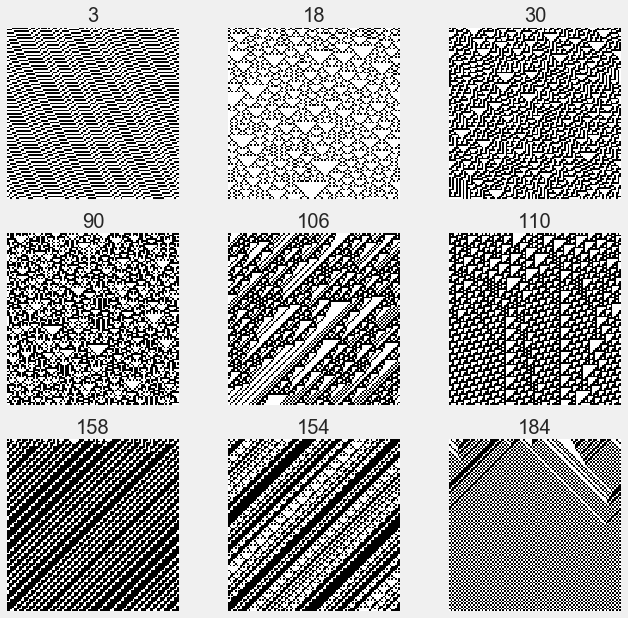

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
rules = [3, 18, 30,
         90, 106, 110,
         158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title(str(rule))

# An Interlude for fractals